# Multi-branch experiments

## Global imports and variables

In [1]:
# Import for interactive notebook (see:
# https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)
from __future__ import division, print_function
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
# In a notebook environment, display the plots inline
%matplotlib inline

# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired
import matplotlib
# Plot size to 14" x 7"

matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

matplotlib.rc('figure', figsize = (20, 10))
# Font size to 14
matplotlib.rc('font', size = 40)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')


from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Layout

# Import to list files in directories
import glob

# Import for regular expressions
import re

# Imports for path operations
import os
import os.path

# For date operations
from datetime import datetime

import pandas as pd
pd.set_option('max_colwidth', -1)

import numpy as np
import configparser


In [2]:
RESULTS_DIR = "/Users/gomerudo/workspace/thesis_results"

def rettext(text):
    return text

form_item_layout = Layout(
    width="50%"
)

## Selecting the desired results

In [3]:
import os.path
results_sorted = sorted(glob.glob("{dir}/*".format(dir=RESULTS_DIR)))
dict_widgets = {}
list_widgets = []
for result in results_sorted:
    hbox = widgets.Box()
    dict_widgets[result] = widgets.Checkbox(
        value=False,
        description=os.path.basename(result),
        disabled=False
    )
    list_widgets.append(dict_widgets[result])

half = len(results_sorted)//2

left_box = widgets.VBox(list_widgets[:half])
right_box = widgets.VBox(list_widgets[half:])
display(widgets.HBox([left_box, right_box]))

## Visualize the average through episodes

/Users/gomerudo/workspace/pyvenv/nas-rl2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/gomerudo/workspace/pyvenv/nas-rl2/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/gomerudo/workspace/pyvenv/nas-rl2/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


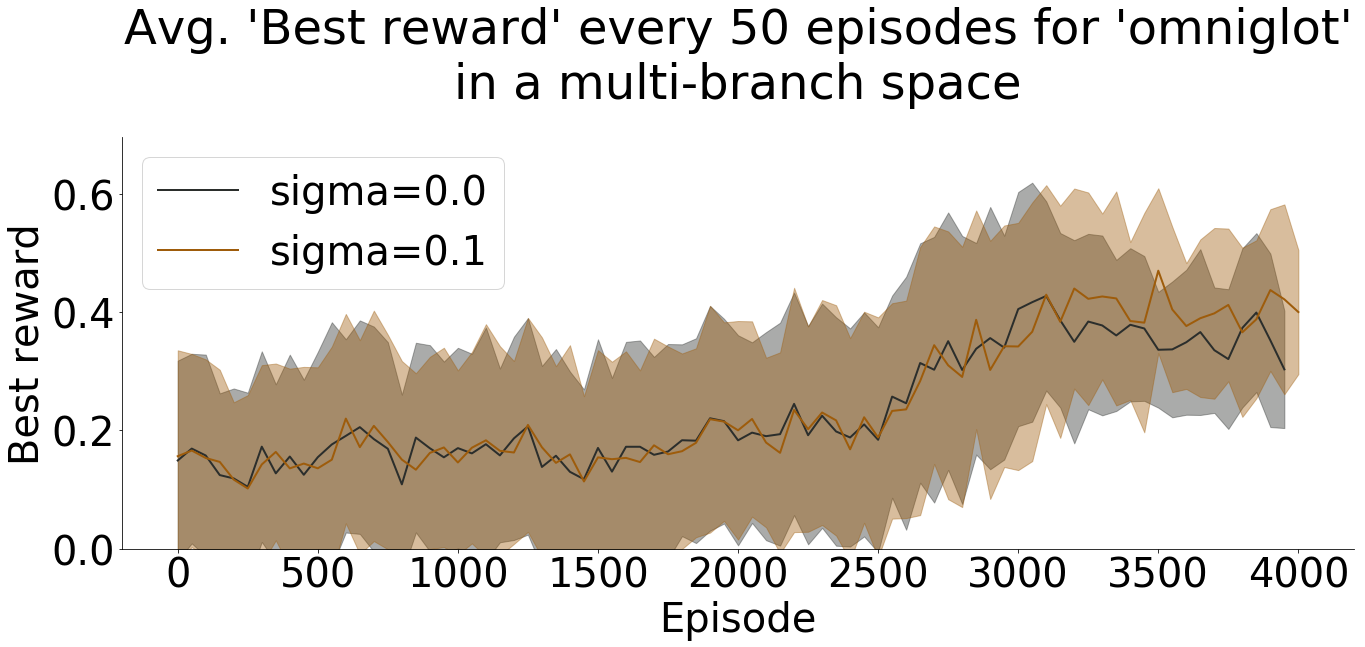

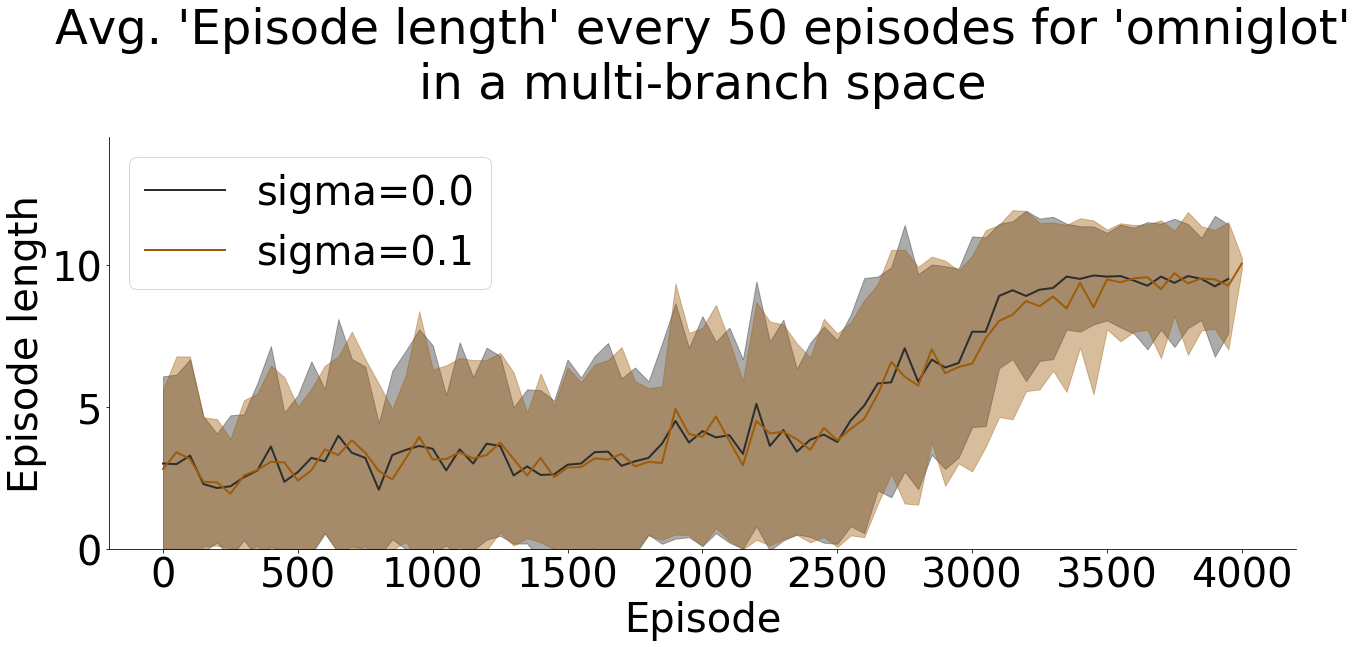

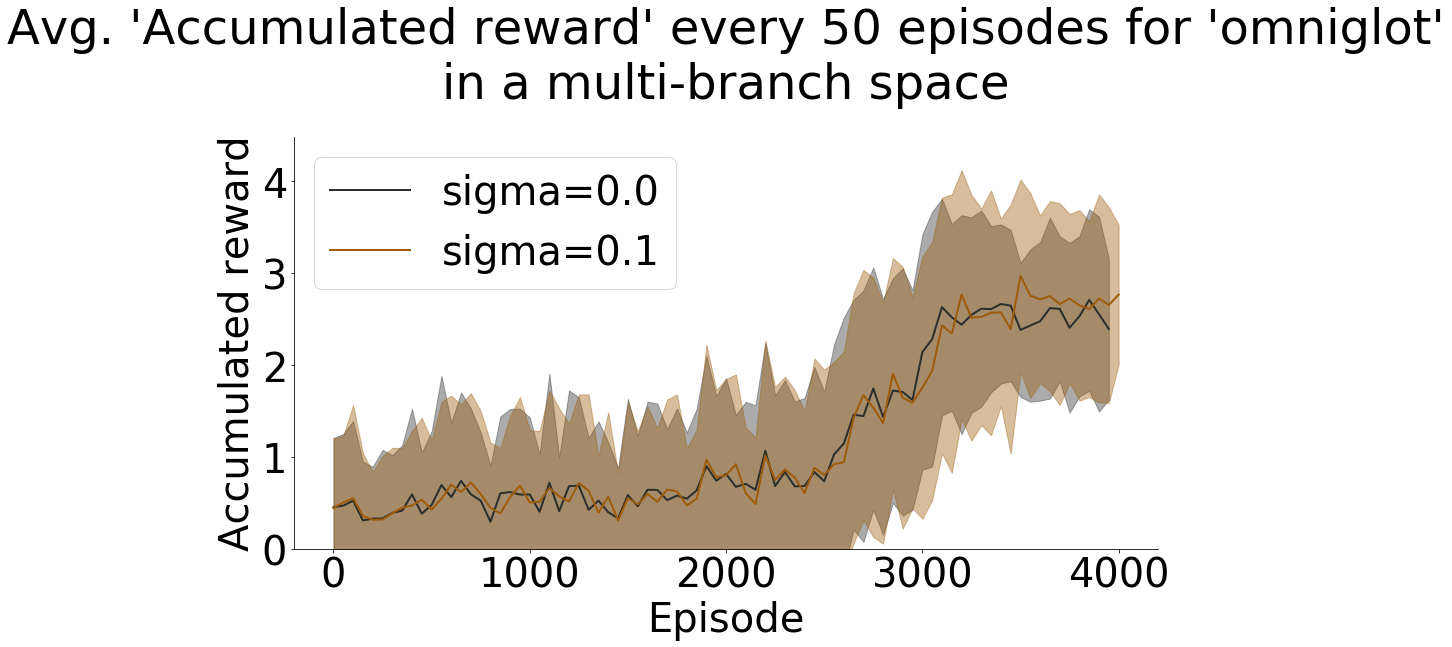

In [7]:
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

matplotlib.rc('figure', figsize = (20, 10))
# Font size to 14
matplotlib.rc('font', size = 40)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure', autolayout=True)


# Get the selected cells
selected_dirs = []

for key, widget in dict_widgets.items():
    if widget.value:
        selected_dirs.append(key)

cdir = selected_dirs[0]
src_dir = "{dir}".format(dir=cdir)

episodes_stats_csv = "{src}/episodes_stats.csv".format(src=src_dir)
epstats_df = pd.read_csv(episodes_stats_csv)
epstats_df.head()

max_eplength = epstats_df['ep_length'].max() + 1
max_accreward = epstats_df['acc_reward'].max() + 1

limits = [ 'max', 'max', 'max']
# print(limits)
mean_n = 50
colors = ["#2b2e2c", "#9e5c0b", "#878787"]
# i = 0

for metric, name_metric, limit in zip(['best_reward', 'ep_length', 'acc_reward'], ['Best reward', 'Episode length', 'Accumulated reward'], limits):
# for dataset in ['omniglot-0.0', 'omniglot-0.1']:
    
#     random_df = epstats_df[epstats_df['dataset'] == 'random-{d}'.format(d=dataset)]
#     dqn_df = epstats_df[epstats_df['dataset'] == 'dqn-{d}'.format(d=dataset)]
    fig, ax = plt.subplots()
#     for metric, name_metric, limit in zip(['best_reward', 'ep_length', 'acc_reward'], ['Best reward', 'Episode length', 'Accumulated reward'], limits):
    i = 0
    for dataset in ['omniglot-0.0', 'omniglot-0.1']:
        meta_df = epstats_df[epstats_df['dataset'] == dataset]
        # Compute the means and std of meta results
        means_meta = meta_df[metric].groupby(meta_df.index // mean_n).mean()
        std_meta = meta_df[metric].groupby(meta_df.index // mean_n).std()
        x_axis_meta = np.array(range(len(means_meta)))*mean_n
            
        # Create the plot object
        
#         if limit is not None:
#             ax.set_ylim(limit)
        if limit == 'max':
            ymax = means_meta.max() + std_meta.max()
            ax.set_ylim([0, ymax])
        if isinstance(limit, int):
            ax.set_ylim([0, limit])
        
        # 245932 eval
        # 539caf train
        ax.plot(x_axis_meta, means_meta, lw = 2, color = colors[i], alpha = 1, label="sigma={sigma}".format(sigma=dataset.split("-")[1]))
        ax.fill_between(x_axis_meta, means_meta - std_meta, means_meta + std_meta, color = colors[i], alpha = 0.4)

#         ax.plot(x_axis_dqn, means_dqn, lw = 2, color = '#6e1414', alpha = 1, label="DQN".format(dataset=dataset))
#         ax.fill_between(x_axis_dqn, means_dqn - std_dqn, means_dqn + std_dqn, color = '#6e1414', alpha = 0.4)

#         # 878787
#         ax.plot(x_axis_random, means_random, lw = 2, color = '#878787', alpha = 1, label="Random Search".format(dataset=dataset))
#         ax.fill_between(x_axis_random, means_random - std_random, means_random + std_random, color = '#878787', alpha = 0.4)

        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.sans-serif'] = 'CMU Serif Roman'
        #         hfont = {'fontname':'Helvetica'}
        i += 1
    # Label the axes and provide a title
    ax.set_title(
        "Avg. '{metric}' every {n} episodes for 'omniglot'\nin a multi-branch space".format(
            metric=name_metric, n=mean_n, dataset=dataset
        ),
        y=1.08
    )
    ax.set_xlabel("Episode")
    ax.set_ylabel(name_metric)

    ax.legend(loc = 'best')
        
    import os
    save_dir = '{root}/figures'.format(root=src_dir)
    if not os.path.exists(save_dir):
        os.mkdir(save_dir);
    fig.savefig(
        '{sdir}/average-{m}-omniglot.png'.format(sdir=save_dir, m=metric, d=dataset)
    )
    
    

## Visualize the exploration of the agent

[    0    10  2510  5010  7510 10010 12510 15010 17510 20010 22510]


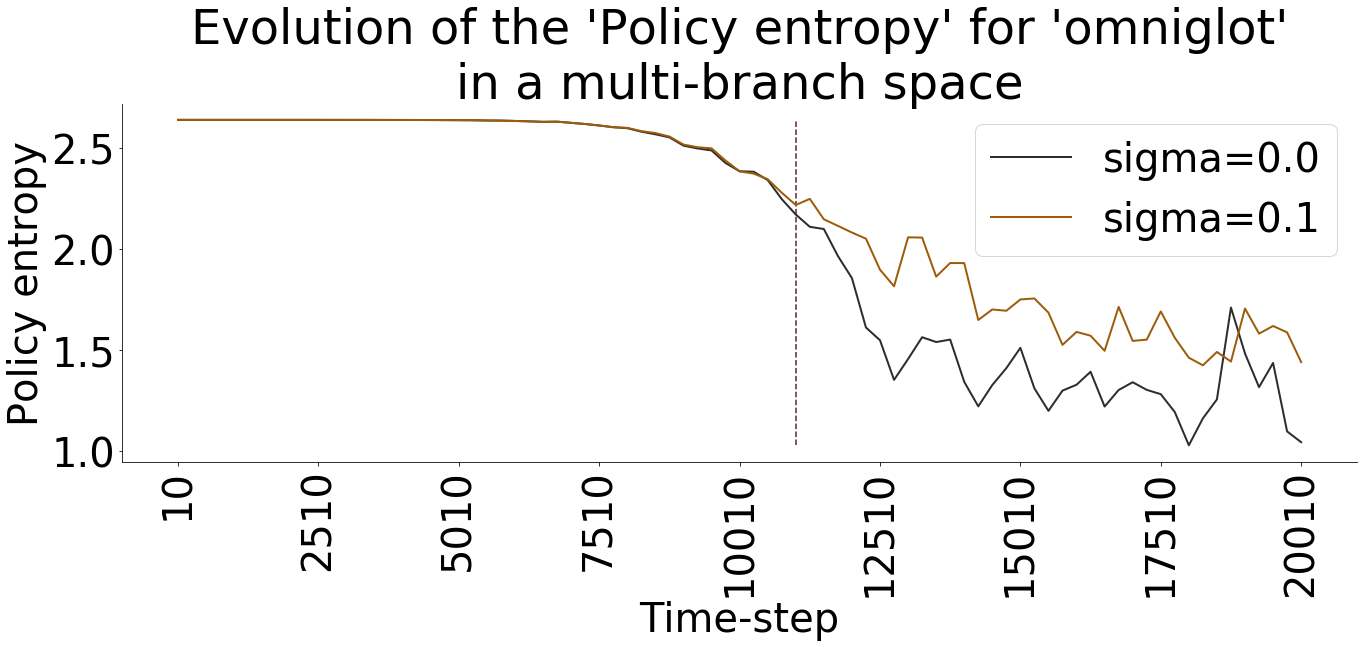

In [109]:
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

matplotlib.rc('figure', figsize = (20, 10))
# Font size to 14
matplotlib.rc('font', size = 40)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure', autolayout=True)




# Get the selected cells
selected_dirs = []

for key, widget in dict_widgets.items():
    if widget.value:
        selected_dirs.append(key)

cdir = selected_dirs[0]
src_dir = "{dir}".format(dir=cdir)

progress_csv = "{src}/progress.csv".format(src=src_dir)
progress_df = pd.read_csv(progress_csv)
progress_df.head()

max_acc = 0
res = {}
# all_values = None
fig, ax = plt.subplots()
colors = ["#2b2e2c", "#9e5c0b", "#878787"]

i = 0
min_entropy = 200
max_entropy = 0
for dataset in ['omniglot-0.0', 'omniglot-0.1']:
    dataset_progress_df = progress_df[progress_df['dataset'] == dataset]
    
    for metric, name_metric in zip(['policy_entropy'], ['Policy entropy']):
        metric_df = dataset_progress_df[metric]
        max_entropy = max(max_entropy, dataset_progress_df[metric].max())
        min_entropy = min(min_entropy, dataset_progress_df[metric].min())
    ax.plot(
        list(range(metric_df.shape[0])),
        metric_df,
        lw = 2, color = colors[i], alpha = 1, label="sigma={sigma}".format(sigma=dataset.split("-")[1])
    )
    i += 1

ax.vlines(x=44, ymin=min_entropy, ymax=max_entropy, linestyles='dashed', color = '#632323')


ax.set_title("Evolution of the 'Policy entropy' for 'omniglot'\nin a multi-branch space")
ax.set_xlabel("Time-step")
ax.set_ylabel(name_metric)

ticks = ax.get_xticks()*250 + 10
# print(len(ticks))
ticks[0] = 0
ticks = np.array(ticks, dtype=np.int)
print(ticks)
ax.set_xticklabels(ticks, rotation=90)
ax.legend(loc = 'best')

epstats_df = pd.read_csv(episodes_stats_csv)

import os
save_dir = '{root}/figures'.format(root=src_dir)
if not os.path.exists(save_dir):
    os.mkdir(save_dir);
fig.savefig(
    '{sdir}/entropy.png'.format(sdir=save_dir)
)   # save the figure to file



## Visualizing the multibranch structures through time

/Users/gomerudo/workspace/pyvenv/nas-rl2/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


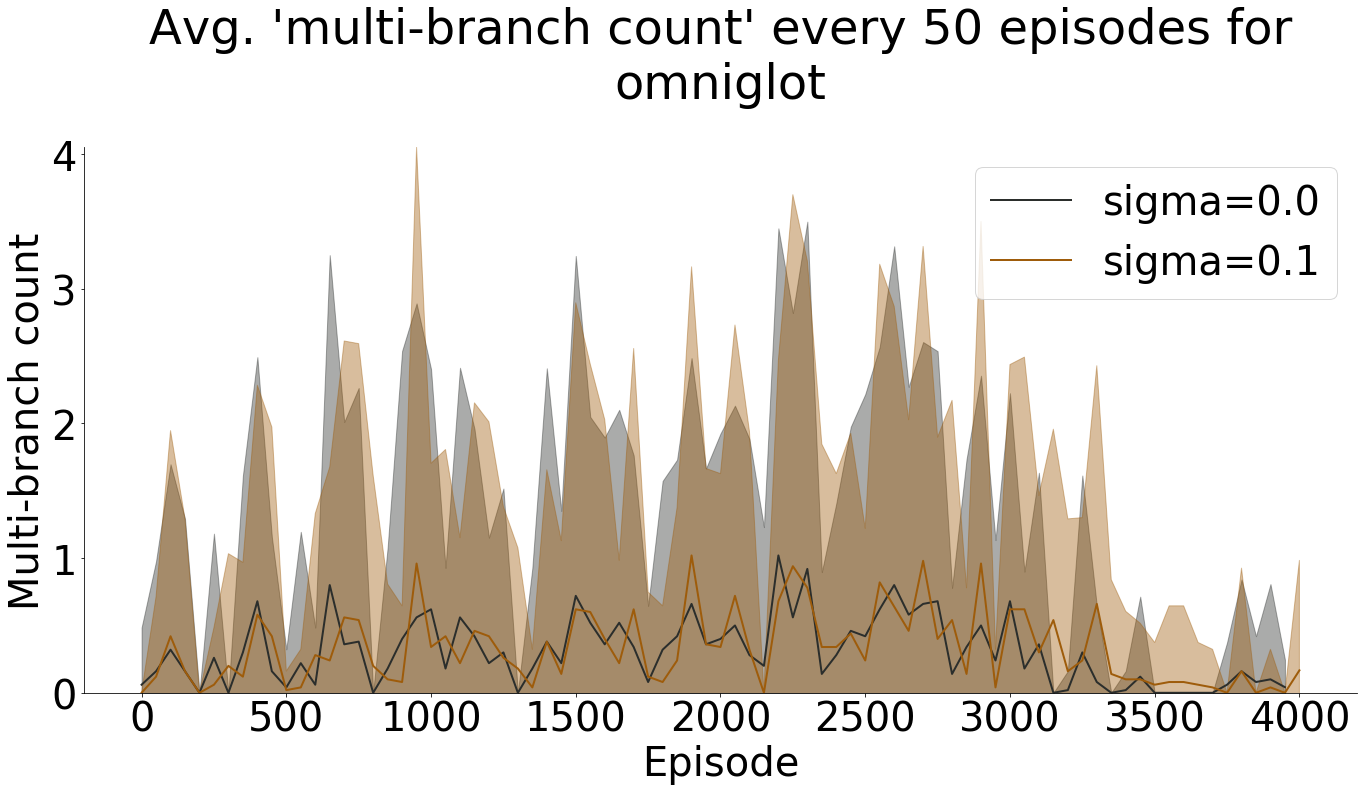

In [108]:
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

matplotlib.rc('figure', figsize = (20, 12))
# Font size to 14
matplotlib.rc('font', size = 40)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure', autolayout=True)
# Get the selected cells
selected_dirs = []

for key, widget in dict_widgets.items():
    if widget.value:
        selected_dirs.append(key)

cdir = selected_dirs[0]
src_dir = "{dir}".format(dir=cdir)

episodes_stats_csv = "{src}/episodes_stats.csv".format(src=src_dir)
epstats_df = pd.read_csv(episodes_stats_csv)

limits = [ 'max', 'max', 'max']
# print(limits)
mean_n = 50
colors = ["#2b2e2c", "#9e5c0b", "#878787"]

# i = 0
# plt.tight_layout()
fig, ax = plt.subplots()
i = 0
max_mbcount = 0
min_mbcount = 20000


for dataset in ['omniglot-0.0', 'omniglot-0.1']:
    meta_df = epstats_df[epstats_df['dataset'] == dataset]
    metric = 'mb_count'
    meta_df = meta_df.sort_values('step')

    # Compute the means and std of meta results
    means_meta = meta_df[metric].groupby(meta_df.index // mean_n).mean()
    std_meta = meta_df[metric].groupby(meta_df.index // mean_n).std()
    x_axis_meta = np.array(range(len(means_meta)))*mean_n

    max_mbcount = max(max_mbcount, (means_meta + std_meta).max())
#     min_mbcount = min(min_mbcount, (means_meta + std_meta).min())
    
    ax.set_ylim([0, max_mbcount])
#     ax.plot(meta_df['step'], meta_df[metric], lw = 2, color = colors[i], alpha = 1, label="{dataset}".format(dataset=dataset))
    ax.plot(x_axis_meta, means_meta, lw = 2, color = colors[i], alpha = 1, label="sigma={sigma}".format(sigma=dataset.split("-")[1]))
    ax.fill_between(x_axis_meta, means_meta - std_meta, means_meta + std_meta, color = colors[i], alpha = 0.4)


    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.sans-serif'] = 'CMU Serif Roman'
    i += 1

# ax.vlines(x=3000, ymin=0, ymax=max_mbcount, linestyles='dashed', color = '#632323')
# Label the axes and provide a title
ax.set_title(
    "Avg. 'multi-branch count' every {n} episodes for\nomniglot".format(
        metric=name_metric, n=mean_n, dataset=dataset
    ),
    y=1.08
)
ax.set_xlabel("Episode")
ax.set_ylabel('Multi-branch count')

ax.legend(loc = 'best')
        
import os
save_dir = '{root}/figures'.format(root=src_dir)
if not os.path.exists(save_dir):
    os.mkdir(save_dir);
fig.savefig(
    '{sdir}/average-mb_count-omniglot.png'.format(sdir=save_dir, m=metric, d=dataset)
)
    
    

## Visualize the counts of MB structures

In [85]:
episodes_stats_csv = "{src}/episodes_stats.csv".format(src=src_dir)
epstats_df = pd.read_csv(episodes_stats_csv)
epstats_df[:3000]['ep_length'].sum()

11048.0

## Actions

['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13']
['A0' 'A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13']


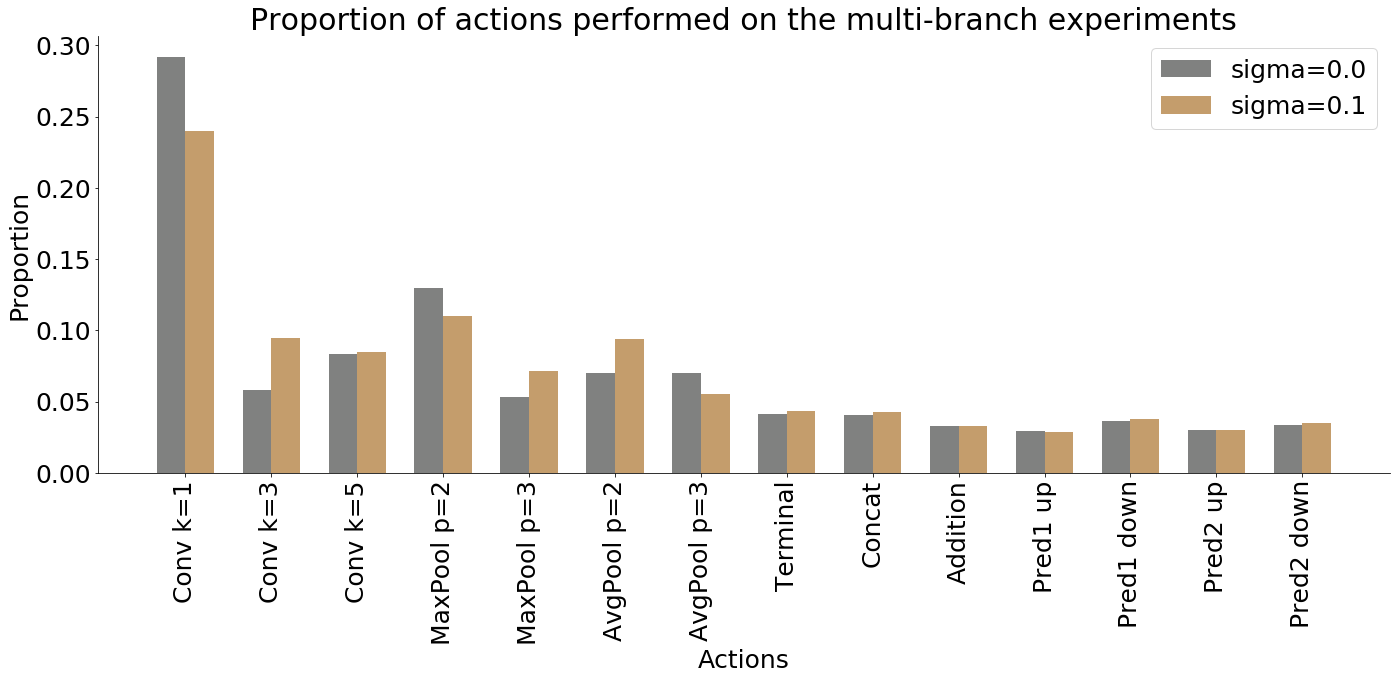

In [6]:
matplotlib.rcParams['font.serif'] = ['CMU Serif Roman']

matplotlib.rc('figure', figsize = (20, 10))
# Font size to 14
matplotlib.rc('font', size = 25)
# Do not display top and right frame lines
matplotlib.rc('axes.spines', top = False, right = False)
# Remove grid lines
matplotlib.rc('axes', grid = False)
# Set backgound color to white
matplotlib.rc('axes', facecolor = 'white')
matplotlib.rc('figure', autolayout=True)




# Get the selected cells
selected_dirs = []

for key, widget in dict_widgets.items():
    if widget.value:
        selected_dirs.append(key)

cdir = selected_dirs[0]
src_dir = "{dir}".format(dir=cdir)

actions_dist_csv = "{src}/actions_dist.csv".format(src=src_dir)
actions_dist_df = pd.read_csv(actions_dist_csv)
max_acc = 0
res = {}
fig, ax = plt.subplots()
enable = False
for dataset in ['omniglot-0.0', 'omniglot-0.1']:
    dataset_actions_dist_df = actions_dist_df[actions_dist_df['dataset'] == dataset]        
    # Create the plot object
    indices = range(len(dataset_actions_dist_df['action_id']))
    print(dataset_actions_dist_df['action_id'].unique())
#     if enable:
    width = np.min(np.diff(indices))/3
    if not enable:
        ax.bar(indices - width/2., dataset_actions_dist_df['count'], width, color = '#2b2e2c', alpha = .6, label="sigma={sigma}".format(sigma=dataset.split("-")[1]))
    else:
        ax.bar(indices + width/2., dataset_actions_dist_df['count'], width, color = '#9e5c0b', alpha = .6, label="sigma={sigma}".format(sigma=dataset.split("-")[1]))
    

    if not enable:
        enable = True

ax.set_title("Proportion of actions performed on the multi-branch experiments".format(dataset=dataset))
ax.set_xlabel("Actions")
ax.set_ylabel("Proportion")

list_names = ["Conv k=1", "Conv k=3", "Conv k=5", "MaxPool p=2", "MaxPool p=3", "AvgPool p=2", "AvgPool p=3", "Terminal", 
              "Concat", "Addition", "Pred1 up", "Pred1 down", "Pred2 up", "Pred2 down"]
ax.set_xticks(range(len(list_names)))
ax.set_xticklabels(list_names)
# ax.set_xticklabels(["0"] + list(dataset_actions_dist_df['action_id']))
ax.legend(loc = 'best')
ax.tick_params(axis ='x', rotation = 90) 



# ax.set_xticks(range(len(actions_dist_df['action_id'].unique())))
# ax.set_xticklabels(list(actions_dist_df['action_id']))
# ax.legend(loc = 'best')


import os
save_dir = '{root}/figures'.format(root=src_dir)
if not os.path.exists(save_dir):
    os.mkdir(save_dir);
fig.savefig(
    '{sdir}/actions-dist-mb.png'.format(sdir=save_dir, dataset=dataset)
)   # save the figure to file